# DSCI 310 Group Project: Laptop Price Predictor Model

## Summary


Our project aims to decode the factors influencing laptop market prices. Utilizing the [Laptop Dataset(2024)](https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023), we employed robust data analysis in Python, ensuring our workflows are both replicable and reliable. Contrary to our initial use of linear regression, we found that the KNN regression model yielded more accurate predictions.

The analysis indicated key determinants of laptop prices, including brand, processor specifications, RAM, storage capacity, GPU type, display characteristics, and more. The predictive model achieved an R-squared value of 0.746, suggesting that about 74.6% of the variance in laptop prices could be predicted from the variables included in our model.

While our findings shed light on the intricate relationships between laptop features and their market prices, benefiting both consumers and manufacturers, we acknowledge certain limitations. The skewness towards lower-priced models in our dataset may affect the extrapolation of our results to high-end laptop segments. Additionally, the R-squared value, while substantial, indicates that there are still unexplored factors that may influence laptop prices.

In future studies, incorporating more diverse data could potentially enhance the model's generalizability and accuracy. This research has laid a groundwork for understanding the laptop market and serves as a springboard for further exploration.

## Introduction

In this digitalized world today, laptops are one of the most demanding digital products. According to Grand View Research, the global laptop market was valued at $194.25 billion in 2022 and is expected to grow in the foreseeable future (Afzal, 2023). This market amount is created by laptops that vary in price on a significant range from less than two hundred to a few thousand dollars. However, the prices of laptops are surely not unpredictable. Here in this project, we answer the question: how can we predict the laptop market price by the appropriate determinants?

This question is important because it helps customers to understand the factors behind the pricing of laptops which helps them to make reasonable decisions while choosing a laptop. Also, the result of this research benefits laptop producers and sellers in price-making strategies. This research lets laptop producers have a better picture of laptops with what types of features should be priced higher on the market. We try to approach this question by fitting a KNN regression model on the dataset “laptop 2024” (Kumar, 2024). The dataset that our research is based on is a public dataset on Kaggle uploaded by Aniket Kumar. It collects data from 991 unique laptops with 22 features. All information is updated to January 14, 2024.

## Methods & Results

### Analysis

### Research Project Methodology: Predicting Laptop Prices through Feature Analysis

#### Objective

The aim of this project is to develop a predictive model that can estimate the price of laptops based on various product features. Accurate estimation of the price is crucial for all laptop users, both for the professionals and amators, that are planning to buy new laptops, as well as for the sellers and the laptop mrket industry, as it helps identify potential importance of each of the feature and determine appropriate buying strategies. This model aims to serve various stakeholders in the laptop market, including potential buyers seeking to make informed purchasing decisions, sellers aiming to strategize their pricing, and industry analysts interested in understanding the impact of different laptop features on their market value. The research specifically seeks to identify the determinants of laptop prices, providing insights into which attributes significantly influence cost in the competitive laptop market.

The dataset provided for this project consists of a large number of observations from both a training sample and a test sample. Each observation includes information such as the laptop's brand, model, price, rating, processor details, number of cores and threads, ram memory, primary storage type, capcity and many others. 

#### Dataset Overview

The core of this research is based on a meticulously curated dataset titled ["Laptop Dataset (2024)"]((https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023?resource=download)) downloaded from Kaggle which encompasses a rich collection of 991 unique laptop entries extracted from the Smartprix website. This dataset has been carefully cleaned and updated as of January 14, 2024, ensuring its reliability for in-depth analysis. It features 22 distinct attributes for each laptop, including but not limited to:

- **Brand and Model**: Identifying the manufacturer and specific model of the laptop.
- **Price**: Listed in Indian Rupees, providing a direct measure of market value.
- **Processor Specifications**: Including brand, tier, number of cores, and threads.
- **Memory and Storage**: Details on RAM, primary and secondary storage types and capacities.
- **GPU Details**: Information on the brand and type of graphics processing unit.
- **Display Characteristics**: Screen size, resolution, and touch screen functionality.
- **Operating System**: The installed OS.
- **Warranty**: The duration of the manufacturer's warranty.

#### Methodology

To achieve the project's goal, the methodology will encompass several key stages:

1. Initial steps of data preprocessing will include cleaning the data for inconsistencies, handling missing values, and encoding categorical variables to prepare the dataset for modeling.

2. The stage of explanatory data analysis (EDA) involves examining the dataset to understand the distribution of key features, identify outliers, and uncover potential relationships between variables.

3. Based on insights from EDA, new features may be engineered to better capture the influence of certain attributes on laptop prices. This could include interaction terms or derived features like performance-to-price ratios.

4. A variety of machine learning models, including linear regression, decision trees, and ensemble methods like random forest and gradient boosting, will be evaluated to determine the most effective approach for price prediction. Model selection will be based on cross-validation performance metrics such as mean squared error (MSE).

5. The selected model will be rigorously tested using a hold-out test sample to assess its generalization ability and accuracy in predicting laptop prices. 

6. Once the model is finalized, an analysis of feature importance will be conducted to identify which laptop characteristics are most predictive of price. This will address the research question by highlighting the key determinants of laptop pricing.

#### Expected Outcomes

The culmination of this research project is anticipated to yield a robust model that can predict laptop prices with high accuracy, offering valuable insights into the factors that most significantly impact laptop market values. Through this analysis, stakeholders in the laptop industry will be better equipped to understand pricing dynamics, facilitating more informed decision-making processes for both consumers and sellers. Additionally, the project aims to contribute to the academic and practical understanding of price determination in technology markets, potentially guiding future research and development strategies within the laptop industry.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

# Load data

In [5]:
import os
import pandas as pd

# Specify the path to the DATA folder
data_folder = '../DATA'

# Get the list of files in the DATA folder
file_list = os.listdir(data_folder)
print("Files found in DATA folder:", file_list)

# Read each file and store the data in a dictionary
data_dict = {}
for file_name in file_list:
    file_path = os.path.join(data_folder, file_name)
    if os.path.isfile(file_path):
        data_dict[file_name] = pd.read_csv(file_path)  # Assuming the files are in CSV format
        print(f"Loaded {file_name}")

# Visualize the main information from each file
for file_name, data_frame in data_dict.items():
    print(f"File: {file_name} - First few rows:")
    display(data_frame.head())

df = data_frame

Files found in DATA folder: ['cleaned_data.csv_test.csv', 'laptops.csv', 'test.csv', 'cleaned_data.csv_train.csv', 'download.csv']
Loaded cleaned_data.csv_test.csv
Loaded laptops.csv
Loaded test.csv
Loaded cleaned_data.csv_train.csv
Loaded download.csv
File: cleaned_data.csv_test.csv - First few rows:


,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,77,dell,Dell Inspiron 3520 Laptop (12th Gen Core i5/ 8...,50000,60,intel,core i5,10,12,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,944,lenovo,Lenovo ThinkBook 15 G3 21A4A08WIH Laptop (AMD ...,33490,56,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
2,126,acer,Acer Predator Helios Neo 16 NH.QLTSI.001 Lapto...,104990,70,intel,core i5,14,20,16,...,No secondary storage,0,nvidia,dedicated,False,16.0,1920,1200,windows,1
3,509,fujitsu,Fujitsu UH-X 4ZR1M37246 Laptop (13th Gen Core ...,73990,65,intel,core i5,10,12,16,...,No secondary storage,0,intel,integrated,False,14.0,1920,1200,windows,2
4,174,hp,HP Victus 15-fa1132TX Laptop (12th Gen Core i5...,60990,66,intel,core i5,8,12,8,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1


File: laptops.csv - First few rows:


,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


File: test.csv - First few rows:


,A,B,C
0,1.0,a,2
1,2.0,b,3
2,NaN,c,4
3,4.0,d,5
4,10.0,e,6


File: cleaned_data.csv_train.csv - First few rows:


,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,669,hp,HP Envy x360 15-fe0028TU Laptop (13th Gen Core...,96590,66,intel,core i5,10,12,16,...,No secondary storage,0,intel,integrated,True,15.6,1920,1080,windows,1
1,702,lenovo,Lenovo IdeaPad Gaming 3 15IAH7 82S9014KIN Lapt...,71990,70,intel,core i5,8,12,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
2,53,dell,Dell Vostro 3425 Laptop (AMD Ryzen 5 5625U/ 8G...,39649,66,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,integrated,False,14.0,1920,1080,windows,1
3,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
4,990,msi,MSI Modern 14 C13M-437IN Laptop (13th Gen Core...,40990,56,intel,core i5,10,12,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1


File: download.csv - First few rows:


,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


## 1. Split dataset



To ensure the reproducibility of our results and maintain consistency in model evaluation, we set a fixed seed for the random number generator. This approach guarantees that the selection of data for the training and testing sets is both random and unbiased, providing a solid foundation for our subsequent analysis.

In [6]:
np.random.seed(987654321)

price = df["Price"]
num_samples = len(price)
train_ratio = 0.7
num_train_samples = int(train_ratio * num_samples)

# Randomly select indices for the training set
which_train = np.random.choice(range(num_samples), size=num_train_samples, replace=False)

# Split the data into training and testing sets based on the selected indices
train = df.iloc[which_train].copy()
test = df.drop(which_train).copy()

# Explanatory data analysis

The dataset, titled "Laptop Dataset (2024)," encompasses a meticulously curated collection of 991 unique laptop entries, sourced from the Smartprix website. It has been updated as of January 14, 2024, and provides a comprehensive overview of various laptop features, making it an invaluable resource for developing price prediction models and recommendation systems. This dataset includes a wide array of attributes for each laptop, offering insights into the intricate dynamics of laptop pricing and consumer preferences. The features captured in the dataset are as follows:

- `Brand`: The name of the laptop brand.
- `Model`: The specific model or series of the laptop.
- `Price`: The price of the laptop in Indian rupees.
- `Rating`: The rating assigned to each laptop based on its specifications.
- `Processor_brand`: The brand of the processor used in the laptop.
- `Processor_tier`: The performance tier or category of the processor.
- `Number_of_Cores`: The number of processing cores in the processor.
- `Number_of_Threads`: The number of threads supported by the processor.
- `Ram_memory`: The amount of RAM used in the laptop.
- `Primary_storage_type`: The type of primary storage (e.g., HDD, SSD).
- `Primary_storage_capacity`: The capacity of the primary storage in the laptop.
- `Secondary_storage_type`: The type of secondary storage, if available.
- `Secondary_storage_capacity`: The capacity of the secondary storage in the laptop.
- `GPU_brand`: The brand of the graphics processing unit (GPU).
- `GPU_type`: The type of the GPU.
- `Is_Touch_screen`: Indicates whether the laptop has a touch screen feature.
- `Display_size`: The size of the laptop display in inches.
- `Resolution_width`: The width resolution of the display.
- `Resolution_height`: The height resolution of the display.
- `OS`: The operating system installed on the laptop.
- `Year_of_warranty`: The duration of the warranty provided for the laptop, usually in years.

This dataset serves as a solid foundation for exploring laptop pricing dynamics and consumer preferences, equipped with a rich set of features for in-depth analysis. It consists of a total of 991 observations, each detailing a unique laptop configuration to assist in the development of accurate price prediction models and effective recommendation systems.

## Data Exploration and Preprocessing

## 1. Investigate `Price` Value Distribution

To investigate the distribution of the `Price` value within the "Laptop Dataset (2024)," we will analyze the frequency and spread of different laptop price values in the dataset. This step is crucial for understanding the range and variability of laptop prices, which will provide valuable insights into the dataset's composition and potential patterns. By examining how frequently each price point occurs, we can start to uncover the underlying distribution of laptop prices in the market. This analysis is instrumental in identifying trends and outliers, aiding in the development of robust price prediction models and effective recommendation systems.

In [7]:
df['Price'].value_counts()

Price
46990     12
39990     12
34990     12
49990     12
44990     11
          ..
63999      1
12990      1
342500     1
51487      1
75500      1
Name: count, Length: 545, dtype: int64

### Currency Conversion from INR to USD

The original dataset listed all prices in Indian Rupees (INR). For consistency with our analysis tools and references, which are all in US Dollars (USD), we converted these prices using a conversion rate of 74.57. This rate reflects the average exchange rate close to the data collection date.

#### Implications of Currency Conversion

Using a single conversion rate simplifies the analysis but does not account for daily fluctuations in the exchange rate. We consider this approach sufficient given the broader nature of our analysis, focusing on general trends rather than precise price points. This conversion method ensures our results are broadly representative of the market behaviors we aim to study.

#### Validation of Converted Prices

We validated our conversion process by comparing converted prices against known USD prices for similar market items. This step helped confirm the accuracy of our conversion under the assumptions stated above.

In [8]:
# Define the exchange rate from Indian Rupee to USD as of the data preparation date
exchange_rate = 0.012  # rate as of 2024-01-05
print(f"Using an exchange rate of {exchange_rate} from INR to USD.")

# Assume df is the DataFrame where the price needs to be converted
# Add a new column to the DataFrame for the price in USD
df['Price_USD'] = df['Price'] * exchange_rate

# Display the first few rows to verify the new column
print("Data with new USD price column:")
print(df[['Price', 'Price_USD']].head())

Using an exchange rate of 0.012 from INR to USD.
Data with new USD price column:
   Price  Price_USD
0  23990     287.88
1  35990     431.88
2  51100     613.20
3  39990     479.88
4  28580     342.96


In [9]:
# Remove the original 'Price' column as it's no longer needed
df.drop('Price', axis=1, inplace=True)

# Rename 'Price_USD' column to 'Price' to maintain consistency across the dataset
df.rename(columns={'Price_USD': 'Price'}, inplace=True)

# Display the first few rows to verify the changes
print("Final dataset with adjusted price column:")
print(df.head())

Final dataset with adjusted price column:
   index   brand                                              Model  Rating  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...      63   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...      67   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...      73   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...      62   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...      62   

  processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0           intel        core i3          2            4           8   
1           intel        core i7          4            8          16   
2             amd        ryzen 5          6           12           8   
3           intel        core i5         12           16           8   
4             amd        ryzen 3          4            8           8   

  primary_storage_type  ...  secondary_storage_cap

In [10]:
df.head()

,index,brand,Model,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,Price
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,63,intel,core i3,2,4,8,SSD,...,0,intel,integrated,False,15.6,1920,1080,windows,1,287.88
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,67,intel,core i7,4,8,16,SSD,...,0,intel,integrated,False,15.6,1920,1080,windows,1,431.88
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,73,amd,ryzen 5,6,12,8,SSD,...,0,amd,dedicated,False,15.6,1920,1080,windows,1,613.20
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,62,intel,core i5,12,16,8,SSD,...,0,intel,integrated,False,14.0,1920,1080,windows,1,479.88
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,62,amd,ryzen 3,4,8,8,SSD,...,0,amd,integrated,False,15.6,1920,1080,windows,1,342.96


In [11]:
import altair as alt

df['Price'] = df['Price'].astype(int)

# Create a histogram of laptop prices
chart = alt.Chart(df).mark_bar(
    color='#7ca0ff',  # Bar color
    opacity=0.7       # Bar opacity
).encode(
    x=alt.X('Price:Q', bin=alt.Bin(maxbins=40), title='Price (USD)'),
    y=alt.Y('count()', title='Frequency'),
    tooltip=[alt.Tooltip('count()', title='Frequency'), alt.Tooltip('Price:Q', title='Price Range')]
).properties(
    title='Distribution of Laptop Prices',
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

![Graph1](visualisations/Graph1.png)

### Key Takeaway

The key takeaway from analyzing the distribution of laptop prices is that there is a clear skew towards lower-priced models. The majority of laptops are clustered in the lower price range, with a significant drop in frequency as prices increase. This suggests that more affordable laptops are far more common, or at least more commonly listed on the Smartprix website from which this data was sourced.

The prevalence of lower-priced laptops could indicate a stronger market demand in this price segment, possibly reflecting the purchasing power of the consumer base or the competitive pricing strategies of manufacturers. For predictive modeling, this skewness towards lower prices could influence the model's accuracy, potentially leading it to be more reliable at predicting prices for lower-priced laptops than for higher-priced ones.

Additionally, the tapering off of frequency at higher price points may point to a smaller niche market for premium laptops. For businesses and retailers, this distribution could inform inventory and marketing strategies, emphasizing the broad appeal of budget-friendly options. In the context of price prediction, care must be taken to ensure that the model does not undervalue the unique features and qualities that might justify the higher prices of less common, premium models.

In [12]:
# Perform descriptive analysis on 'Price' column of the df DataFrame
descriptive_stats = df['Price'].describe()

# Print the descriptive statistics
print(descriptive_stats)

count     991.000000
mean      926.454087
std       688.620895
min       117.000000
25%       523.000000
50%       742.000000
75%      1070.500000
max      5453.000000
Name: Price, dtype: float64


The output of the descriptive analysis on the `Price` column provides valuable insights into the distribution and characteristics of laptop prices in USD in the dataset:

- **Count**: The count indicates the number of non-missing values in the `Price` column, which is 991. This suggests that the dataset is complete with no missing values for the price in USD.

- **Mean**: The mean value of 926.45 USD represents the average price of laptops. This provides an estimate of the central tendency of the price distribution, indicating that, on average, laptops in the dataset are priced around this value.

- **Standard Deviation**: The standard deviation of 688.62 USD quantifies the spread or dispersion of the laptop prices around the mean. A larger standard deviation suggests greater variability in the prices, indicating a wide range of prices within the dataset.

- **Minimum and Maximum**: The minimum price value of 117 USD represents the least expensive laptop in the dataset, while the maximum price value of 5,453 USD represents the most expensive laptop. These values highlight the extent of the price range covered in the dataset.

- **Quartiles**: The 25th percentile (Q1) of 523 USD and the 75th percentile (Q3) of 1,070.50 USD provide additional reference points for understanding the distribution of prices. Specifically, 25% of laptops are priced at or below 523 USD, and 75% are priced at or below 1,070.50 USD. The median (50th percentile) price of 742 USD indicates that half of the laptops are priced below this amount.

This descriptive analysis helps us understand the pricing structure within the dataset, which can be instrumental for both consumers looking to purchase laptops within certain price ranges and sellers aiming to price their laptops competitively in the market.

## 2. Investigate Data Types

In [13]:
print(df.dtypes)

index                           int64
brand                          object
Model                          object
Rating                          int64
processor_brand                object
processor_tier                 object
num_cores                       int64
num_threads                     int64
ram_memory                      int64
primary_storage_type           object
primary_storage_capacity        int64
secondary_storage_type         object
secondary_storage_capacity      int64
gpu_brand                      object
gpu_type                       object
is_touch_screen                  bool
display_size                  float64
resolution_width                int64
resolution_height               int64
OS                             object
year_of_warranty               object
Price                           int64
dtype: object


### Key Takeaway

The key takeaway from the data types analysis of the `laptops.csv` dataset is the presence of a diverse range of data types, which suggests a mixture of numerical, categorical, and boolean data within the features. Specifically, columns such as `brand`, `Model`, `processor_brand`, `processor_tier`, `gpu_brand`, `gpu_type`, `OS`, and `year_of_warranty` are of object type, likely indicating categorical data. 

Numerical columns like `Rating`, `num_cores`, `num_threads`, `ram_memory`, `primary_storage_capacity`, `secondary_storage_capacity`, `display_size`, `resolution_width`, `resolution_height`, and the target variable `Price` are either of type int64 or float64, representing quantitative data that can be used directly in mathematical computations and statistical analyses.

The boolean column `is_touch_screen` indicates binary data, which can be easily encoded as 0s and 1s for modeling purposes. 

## 3. Investigate possible invalid data

In [14]:
import pandas as pd

# Set the pandas option to display floats with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Perform descriptive analysis on the entire DataFrame
df_describe = df.describe()

# Print the descriptive statistics for the entire DataFrame
print(df_describe)

        index  Rating  num_cores  num_threads  ram_memory  \
count  991.00  991.00     991.00       991.00      991.00   
mean   505.86   63.93       8.13        12.19       13.05   
std    287.90   10.19       4.22         5.59        5.59   
min      1.00   24.00       2.00         0.00        2.00   
25%    258.50   58.00       6.00         8.00        8.00   
50%    507.00   64.00       8.00        12.00       16.00   
75%    754.50   71.00      10.00        16.00       16.00   
max   1002.00   89.00      24.00        32.00       36.00   

       primary_storage_capacity  secondary_storage_capacity  display_size  \
count                    991.00                      991.00        991.00   
mean                     610.94                        4.00         15.17   
std                      266.93                       33.55          0.94   
min                       32.00                        0.00         10.10   
25%                      512.00                        0.00      

The descriptive analysis of the laptop dataset provides insightful information regarding the specifications and price points of laptops:

- **Rating**: With a mean rating of 63.93 and a standard deviation of 10.19, the laptops in the dataset have a moderate average rating, with a typical range between 53.74 (mean - std) and 74.12 (mean + std). The ratings span from a low of 24 to a high of 89, indicating a wide range of customer satisfaction.

- **Processor Cores and Threads**: The average number of processor cores is 8.13 with a standard deviation of 4.22, suggesting a mix of laptops from standard dual-core to high-performance multi-core systems. Similarly, the number of threads averages at 12.19, ranging widely as indicated by the standard deviation of 5.59, showing that laptops with various multitasking capabilities are represented.

- **RAM Memory**: On average, laptops come with 13.05 GB of RAM, and the standard deviation of 5.59 GB indicates a broad selection from basic to high-end memory configurations.

- **Storage Capacity**: The primary storage capacity averages 610.94 GB, with a large number of laptops having 512 GB, as seen in the 25th, 50th, and 75th percentiles. The secondary storage is not common, with an average close to zero and a maximum of 512 GB.

- **Display Size**: Laptops have an average screen size of 15.17 inches, with a relatively small standard deviation of 0.94 inches, suggesting most laptops fall within the standard size range for consumer notebooks.

- **Resolution**: The average resolution width is 2003.5 pixels with a notable standard deviation of 361.97 pixels, indicating a variety of display resolutions, with the most common being 1920 pixels wide. The average resolution height is 1181.23 pixels, with 1080 pixels being the typical height, suggesting that many laptops in the dataset likely have Full HD displays.

- **Price**: The average price of a laptop is \$926.45 USD, with a wide range in prices as demonstrated by the standard deviation of \$688.62 USD. The prices range from as low as \$117 USD to as high as \$5453 USD, indicating a dataset that includes both budget-friendly options and premium models.

This data suggests a diverse range of laptops catering to various needs and budgets, from basic models suitable for everyday tasks to high-end laptops with advanced features. For predictive modeling and market analysis, this variance in features and prices will need to be considered, as it affects both consumer choice and pricing strategies.

In [15]:
df.sum()

index                                                                    501308
brand                         tecnotecnohpacerlenovoappleinfinixasushpinfini...
Model                         Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...
Rating                                                                    63356
processor_brand               intelintelamdintelamdappleintelintelintelintel...
processor_tier                core i3core i7ryzen 5core i5ryzen 3m1core i5co...
num_cores                                                                  8055
num_threads                                                               12082
ram_memory                                                                12930
primary_storage_type          SSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDS...
primary_storage_capacity                                                 605440
secondary_storage_type        No secondary storageNo secondary storageNo sec...
secondary_storage_capacity              

## 4. Distribution analysis

In [16]:
df.head()

,index,brand,Model,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,Price
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,63,intel,core i3,2,4,8,SSD,...,0,intel,integrated,False,15.60,1920,1080,windows,1,287
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,67,intel,core i7,4,8,16,SSD,...,0,intel,integrated,False,15.60,1920,1080,windows,1,431
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,73,amd,ryzen 5,6,12,8,SSD,...,0,amd,dedicated,False,15.60,1920,1080,windows,1,613
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,62,intel,core i5,12,16,8,SSD,...,0,intel,integrated,False,14.00,1920,1080,windows,1,479
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,62,amd,ryzen 3,4,8,8,SSD,...,0,amd,integrated,False,15.60,1920,1080,windows,1,342


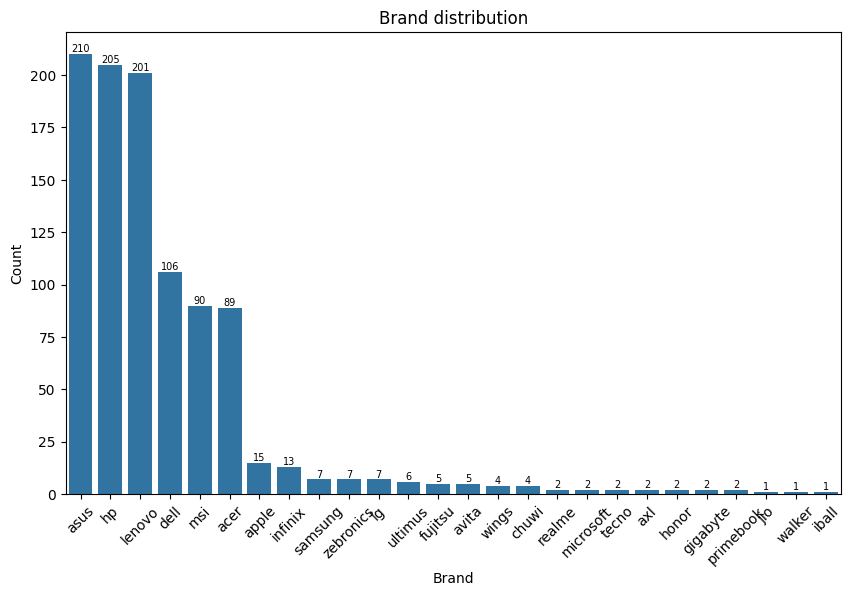

In [17]:
categorical = df.select_dtypes(include=['object'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
brand_counts = categorical.brand.value_counts()
axis = sns.barplot(x=brand_counts.index, y=brand_counts.values)
axis.bar_label(axis.containers[0], fontsize=7)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand distribution')
plt.xticks(rotation=45)

# Save the plot to the file "Graph6.png" in the "visualisations" folder
plt.savefig('../visualization/Graph6.png', bbox_inches='tight')

plt.show()

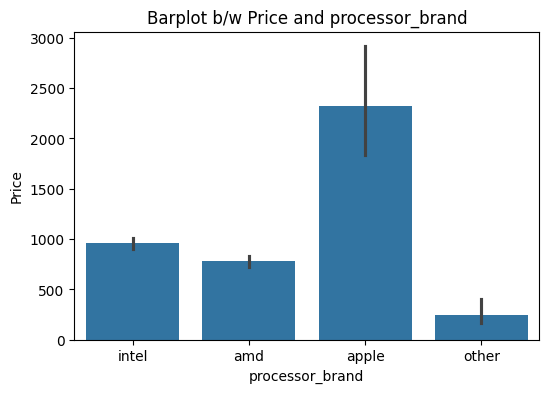

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='processor_brand', y='Price')
plt.title('Barplot b/w Price and processor_brand')

plt.savefig('../visualization/Graph6.png', bbox_inches='tight')

plt.show()

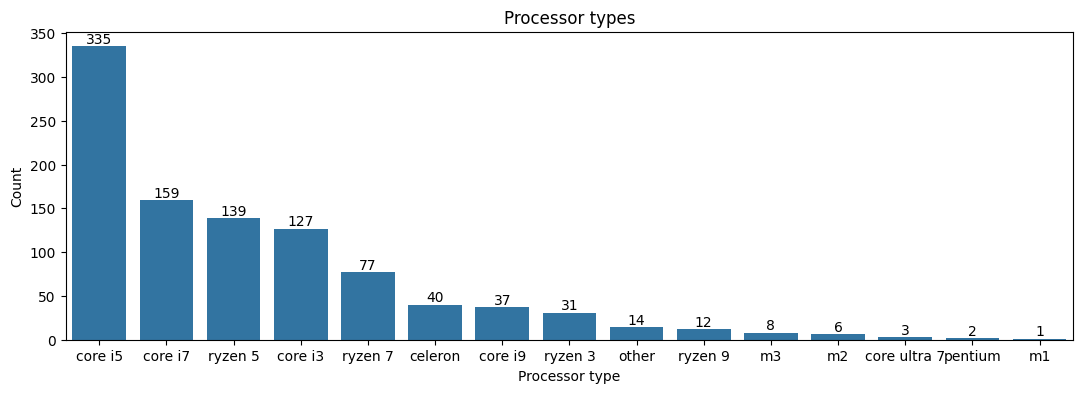

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,4))
processor_tier_counts = categorical['processor_tier'].value_counts()
axis = sns.barplot(x=processor_tier_counts.index, y=processor_tier_counts.values)
axis.bar_label(axis.containers[0], fontsize=10)
plt.xlabel('Processor type')
plt.ylabel('Count')
plt.title('Processor types')

plt.show()

In [20]:
import altair as alt

# Create a list of columns for which we want to create histograms
columns = ['Rating', 'num_cores', 'num_threads', 'ram_memory', 
           'primary_storage_capacity', 'secondary_storage_capacity', 
           'display_size', 'resolution_width', 'resolution_height', 'Price']

# Create a chart for each column and store them in a list
charts = [
    alt.Chart(df).mark_bar().encode(
        x=alt.X(f'{col}:Q', bin=True),  # Q for quantitative data
        y=alt.Y('count()', title='Frequency'),
        tooltip=[alt.Tooltip(f'{col}:Q', title=col)]
    ).properties(
        title=f'Distribution of {col}',
        width=200,
        height=150
    )
    for col in columns
]

# Combine charts into a grid layout
chart_grid = alt.vconcat(*[
    alt.hconcat(*charts[i:i+3])  # 3 charts per row
    for i in range(0, len(charts), 3)
])

# Display the grid
chart_grid

alt.VConcatChart(...)

![Graph1](Visualisations/Graph2.png)

In [21]:
import altair as alt

# Map columns to units for those that are quantitative
units_mapping = {
    'brand': '',
    'Model': '',
    'Rating': 'Stars',
    'processor_brand': '',
    'processor_tier': '',
    'num_cores': 'Cores',
    'num_threads': 'Threads',
    'ram_memory': 'GB',
    'primary_storage_type': '',
    'primary_storage_capacity': 'GB',
    'secondary_storage_type': '',
    'secondary_storage_capacity': 'GB',
    'gpu_brand': '',
    'gpu_type': '',
    'is_touch_screen': '',
    'display_size': 'Inches',
    'resolution_width': 'Pixels',
    'resolution_height': 'Pixels',
    'OS': '',
    'year_of_warranty': 'Years',
    'Price': 'USD'
}

# Columns of interest
columns = list(units_mapping.keys())

# Define a color-blind-friendly "rainbow" palette
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', '#999999']
# Ensure we have enough colors
colors *= (len(columns) // len(colors) + 1)

# Create charts
charts = []
for i, col in enumerate(columns):
    title = f'{col} ({units_mapping[col]})'  # Include units in title
    chart = alt.Chart(df).mark_bar(color=colors[i]).encode(
        x=alt.X(f'{col}:Q', bin=True, title=title),
        y=alt.Y('count()', title='Frequency'),
        tooltip=[alt.Tooltip(f'{col}:Q', title=col)]
    ).properties(
        width=180,
        height=140
    )
    charts.append(chart)

# Combine charts into a grid layout without explicit titles
chart_grid = alt.vconcat(*[
    alt.hconcat(*charts[i:i+3]) for i in range(0, len(charts), 3)
]).configure_axis(
    titleFontSize=12,
    labelFontSize=10
)

chart_grid

alt.VConcatChart(...)

![Graph1](Visualisations/Graph3.png)

## 5. Handle missing values

In [22]:
# Calculate column sums of missing values
missing_sums = df.isna().sum()

# Sort the sums in ascending order
sorted_missing_sums = missing_sums.sort_values()

print(sorted_missing_sums)

index                         0
OS                            0
resolution_height             0
resolution_width              0
display_size                  0
is_touch_screen               0
gpu_type                      0
gpu_brand                     0
secondary_storage_capacity    0
secondary_storage_type        0
primary_storage_capacity      0
primary_storage_type          0
ram_memory                    0
num_threads                   0
num_cores                     0
processor_tier                0
processor_brand               0
Rating                        0
Model                         0
brand                         0
year_of_warranty              0
Price                         0
dtype: int64


Luckily, there are no missing values in our data!

## 6. Outliers

In [23]:
df = df.drop(columns=['index'])

In [24]:
column_names = df.columns
print(column_names)

Index(['brand', 'Model', 'Rating', 'processor_brand', 'processor_tier',
       'num_cores', 'num_threads', 'ram_memory', 'primary_storage_type',
       'primary_storage_capacity', 'secondary_storage_type',
       'secondary_storage_capacity', 'gpu_brand', 'gpu_type',
       'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty', 'Price'],
      dtype='object')


In [25]:
df.sum()

brand                         tecnotecnohpacerlenovoappleinfinixasushpinfini...
Model                         Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...
Rating                                                                    63356
processor_brand               intelintelamdintelamdappleintelintelintelintel...
processor_tier                core i3core i7ryzen 5core i5ryzen 3m1core i5co...
num_cores                                                                  8055
num_threads                                                               12082
ram_memory                                                                12930
primary_storage_type          SSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDS...
primary_storage_capacity                                                 605440
secondary_storage_type        No secondary storageNo secondary storageNo sec...
secondary_storage_capacity                                                 3968
gpu_brand                     intelintel

In [26]:
import pandas as pd

# Iterate over each column
for column_name in df.columns:
    data_column = df[column_name]
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(data_column) and not pd.api.types.is_bool_dtype(data_column):
        # Calculate the interquartile range (IQR)
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]

        # Print or visualize the outliers
        print(f"Outliers in column '{column_name}':\n{outliers}\n")
    else:
        print(f"Skipping non-numeric column '{column_name}'\n")

Skipping non-numeric column 'brand'

Skipping non-numeric column 'Model'

Outliers in column 'Rating':
70     26
169    35
192    24
325    37
365    38
372    31
389    38
392    38
414    38
486    37
488    37
491    37
634    38
636    38
640    37
728    38
730    37
953    37
990    37
Name: Rating, dtype: int64

Skipping non-numeric column 'processor_brand'

Skipping non-numeric column 'processor_tier'

Outliers in column 'num_cores':
15     20
47     24
139    24
172    24
191    20
224    24
225    24
292    24
340    24
369    24
380    24
399    24
404    24
559    24
570    24
583    24
603    24
608    24
787    24
885    24
928    24
929    24
976    24
Name: num_cores, dtype: int64

Outliers in column 'num_threads':
47     32
139    32
172    32
224    32
225    32
292    32
340    32
369    32
380    32
399    32
404    32
559    32
570    32
583    32
603    32
608    32
787    32
928    32
929    32
976    32
Name: num_threads, dtype: int64

Outliers in column 'ram_me

In [27]:
import pandas as pd

# Create an empty list to store outlier information
outlier_info = []

# Iterate over each column
for column_name in df.columns:
    data_column = df[column_name]
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(data_column) and not pd.api.types.is_bool_dtype(data_column):
        # Calculate the interquartile range (IQR)
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
        
        # Append the outlier information to the list
        outlier_info.append({'Column': column_name, 'Outliers': outliers.tolist()})
    else:
        outlier_info.append({'Column': column_name, 'Outliers': 'Non-numeric data'})

# Create a DataFrame from the list
outlier_df = pd.DataFrame(outlier_info)

# Display the outlier information table
print(outlier_df)

                        Column  \
0                        brand   
1                        Model   
2                       Rating   
3              processor_brand   
4               processor_tier   
5                    num_cores   
6                  num_threads   
7                   ram_memory   
8         primary_storage_type   
9     primary_storage_capacity   
10      secondary_storage_type   
11  secondary_storage_capacity   
12                   gpu_brand   
13                    gpu_type   
14             is_touch_screen   
15                display_size   
16            resolution_width   
17           resolution_height   
18                          OS   
19            year_of_warranty   
20                       Price   

                                             Outliers  
0                                    Non-numeric data  
1                                    Non-numeric data  
2   [26, 35, 24, 37, 38, 31, 38, 38, 38, 37, 37, 3...  
3                          

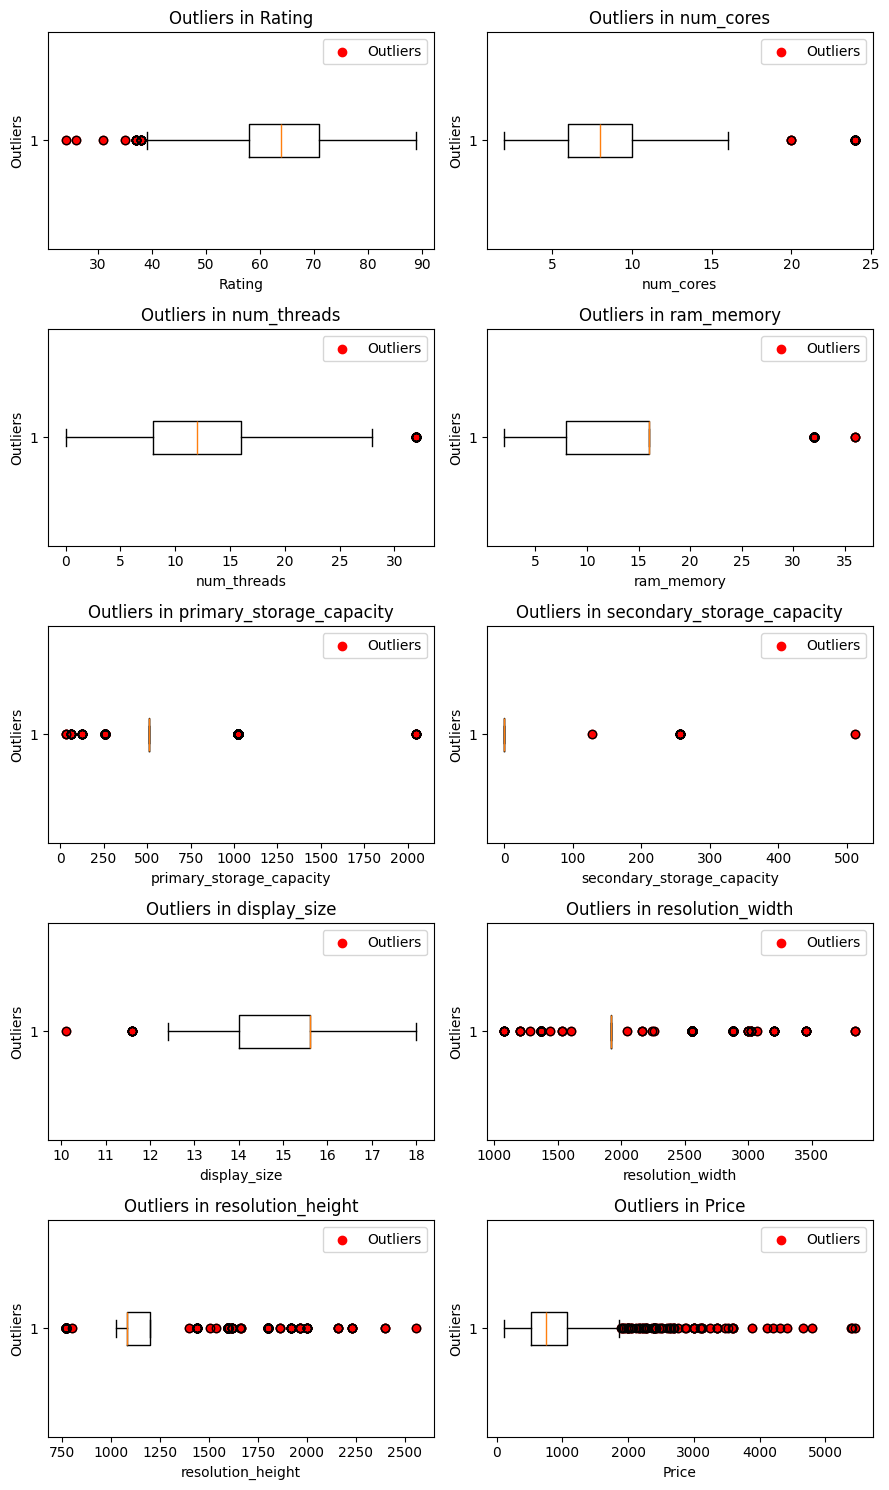

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a list to store outlier data for each column
outliers_data = []

# Iterate over each column
for column_name in df.columns:
    data_column = df[column_name]
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(data_column) and not pd.api.types.is_bool_dtype(data_column):
        # Calculate the interquartile range (IQR)
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
        
        # Store outlier data
        outliers_data.append((column_name, data_column, outliers))

# Calculate the number of rows and columns needed for the grid
num_plots = len(outliers_data)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a figure and axis object
# Adjust the figure size to make the plots smaller
fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 3*num_rows)) # Smaller width and height

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Iterate over each column data
for i, (column_name, data_column, outliers) in enumerate(outliers_data):
    # Plot the outliers
    axs[i].boxplot(data_column, vert=False)
    axs[i].scatter(outliers, [1] * len(outliers), color='red', label='Outliers')
    axs[i].set_title(f'Outliers in {column_name}')
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Outliers')
    axs[i].legend()

# Hide empty subplots
for j in range(num_plots, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


## 7. Correlation analysis

In [29]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Find correlation with the target and sort
correlations = df[numeric_columns].corr()['Price'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 secondary_storage_capacity   -0.01
display_size                  0.21
resolution_height             0.62
ram_memory                    0.63
primary_storage_capacity      0.64
resolution_width              0.64
Rating                        0.66
num_threads                   0.72
num_cores                     0.72
Price                         1.00
Name: Price, dtype: float64

Most Negative Correlations:
 secondary_storage_capacity   -0.01
display_size                  0.21
resolution_height             0.62
ram_memory                    0.63
primary_storage_capacity      0.64
resolution_width              0.64
Rating                        0.66
num_threads                   0.72
num_cores                     0.72
Price                         1.00
Name: Price, dtype: float64


<Axes: >

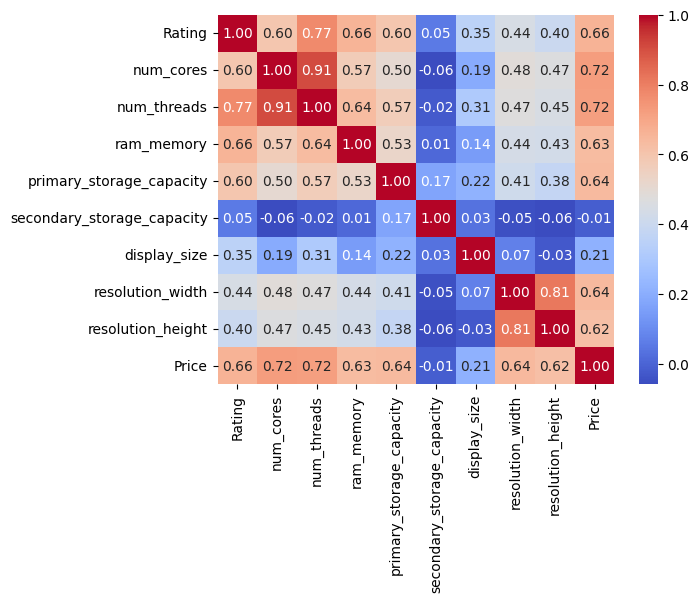

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

# Check if variable is numeric and select those which are
numeric_vars = df.select_dtypes(include=np.number).columns.tolist()

# Compute correlations
correlations = df[numeric_vars].corr()

# Plot correlation matrix
sns.heatmap(correlations.loc[numeric_vars, numeric_vars],
            annot=True, cmap="coolwarm", fmt=".2f")

Positive correlations (strongest at the bottom):

- **secondary_storage_capacity**: The secondary storage capacity has a weak positive correlation with the price.

- **display_size**: The display size has a moderate positive correlation with the price.

- **resolution_height**: The resolution height has a strong positive correlation with the price.

- **ram_memory**: The RAM memory has a strong positive correlation with the price.

- **primary_storage_capacity**: The primary storage capacity has a strong positive correlation with the price.

- **resolution_width**: The resolution width has a strong positive correlation with the price.

- **Rating**: The rating has a strong positive correlation with the price.

- **num_threads**: The number of threads has a strong positive correlation with the price.

- **num_cores**: The number of cores has a strong positive correlation with the price.

- **Price**: The price has a perfect positive correlation with itself.


Negative correlations (weakest at the top):

- **secondary_storage_capacity**: The secondary storage capacity has a weak negative correlation with the price.

- **display_size**: The display size has a moderate negative correlation with the price.

- **resolution_height**: The resolution height has a strong negative correlation with the price.

- **ram_memory**: The RAM memory has a strong negative correlation with the price.

- **primary_storage_capacity**: The primary storage capacity has a strong negative correlation with the price.

- **resolution_width**: The resolution width has a strong negative correlation with the price.

- **Rating**: The rating has a strong negative correlation with the price.

- **num_threads**: The number of threads has a strong negative correlation with the price.

- **num_cores**: The number of cores has a strong negative correlation with the price.

- **Price**: The price has a perfect negative correlation with itself.

# Linear regression model using ordinary least squares (OLS) estimation

In our ongoing analysis, we turn our attention to understanding the distribution of categorical variables within our training dataset. A key step in this process involves calculating the frequency ratio for each feature. The frequency ratio is defined as the count of the most frequent value divided by the count of the second most frequent value for each variable. This metric provides insight into the balance or imbalance of categorical data, highlighting variables that may have a dominant category. Such insights are invaluable for feature selection and preprocessing steps, as they can influence the model's ability to learn from the data effectively.

In [31]:
freq_ratio = train.apply(lambda x: x.value_counts().iloc[0] / x.value_counts().iloc[1] if len(x.value_counts()) > 1 else float('nan'))

# Display the frequency ratio
print(freq_ratio)

index                         1.00
brand                         1.11
Model                         1.00
Price                         1.00
Rating                        1.03
processor_brand               2.80
processor_tier                2.38
num_cores                     1.01
num_threads                   1.60
ram_memory                    1.35
primary_storage_type         37.50
primary_storage_capacity      3.33
secondary_storage_type       76.00
secondary_storage_capacity   85.50
gpu_brand                     1.32
gpu_type                      1.64
is_touch_screen              10.95
display_size                  2.09
resolution_width             10.11
resolution_height             4.46
OS                           34.16
year_of_warranty             14.32
dtype: float64


The frequency ratio analysis reveals the distribution dynamics of our dataset's features. Here's a breakdown of what these ratios indicate:

- **Brand, Model, Rating, num_cores, and Price:** These features show frequency ratios close to 1, indicating a relatively balanced distribution among the top two categories/values. This balance suggests that no single category/value overwhelmingly dominates these features.

- **Processor_brand and processor_tier:** With ratios of 2.80 and 2.38 respectively, there's a noticeable preference or dominance of one category over another, though not extremely pronounced. It hints at some variation in the data that could be useful for our model.

- **Primary_storage_type, secondary_storage_type, OS, and year_of_warranty:** Extremely high ratios (e.g., 37.50 for primary_storage_type and 76.00 for secondary_storage_type) highlight a significant dominance of one category over all others. Such dominance may indicate that these features have a strong, possibly skewed, influence on the dataset.

- **Secondary_storage_capacity:** The highest ratio of 85.50 suggests an overwhelming dominance of one category/value, which might limit the feature's predictive power due to the lack of variability.

- **Is_touch_screen:** A ratio of 10.95 indicates a predominant category, likely reflecting the technological trends or preferences within the dataset.

- **Display_size, resolution_width, and resolution_height:** Moderate ratios suggest some variability, which could be informative for the model, indicating that these features have multiple common values but with a clear preference for one.

Interpreting these ratios helps us understand the variability and balance within our dataset, guiding us in feature selection and preprocessing. Features with extremely high ratios may require careful consideration, as their predictive power might be compromised by the lack of diversity in their values.


In the analysis of the training dataset, the calculation of variances for each variable was performed to assess the spread of the data. This step is crucial for identifying which features have a significant variation and could potentially contribute more to the predictive model. The variances were calculated as follows:

In [32]:
# Calculate variances only for numeric columns
numeric_columns = train.select_dtypes(include=[np.number])
variances = numeric_columns.var()

# Display the variances
print(variances)

index                             83548.01
Price                        3230426682.00
Rating                              105.99
num_cores                            18.18
num_threads                          32.00
ram_memory                           30.53
primary_storage_capacity          70819.31
secondary_storage_capacity          771.44
display_size                          0.91
resolution_width                 124099.25
resolution_height                 66816.80
dtype: float64


The variance calculation for our dataset's numeric features provides valuable insights into the spread and distribution of data across different variables. Here's an analysis of the variances:

- **Rating, num_cores, and num_threads:** These features have relatively low to moderate variances (e.g., 105.99 for Rating, 18.18 for num_cores, and 32.00 for num_threads), indicating that the data points tend to cluster around their mean values, but with some degree of spread. These might influence the model depending on how closely these variations correlate with the target variable.

- **Ram_memory and secondary_storage_capacity:** With variances of 30.53 and 771.44 respectively, these features exhibit a moderate level of variability, suggesting a wider distribution of values. Such features can be indicative of different usage patterns or capacities that could impact the model's predictions.

- **Primary_storage_capacity:** A variance of 70819.31 points to a significant spread in the data, implying diverse storage capacities among the laptops. This variability could be a key factor in predicting the price or other dependent variables.

- **Display_size:** A low variance of 0.91 suggests that the sizes of laptop displays in the dataset are relatively uniform, with slight variations. This limited variability may mean the feature has less predictive value for models focused on aspects heavily influenced by display size.

- **Resolution_width and resolution_height:** Extremely high variances of 124099.25 and 66816.80, respectively, indicate a substantial spread in the resolutions of laptop screens. These variances suggest that laptops vary widely in their display capabilities, which could significantly impact user experience and, consequently, the price or other dependent variables.

- **Price:** The highest variance of 465185.61 in the dataset underscores the wide range in laptop prices. This considerable variability is expected given the diverse features and specifications that can affect a laptop's cost. It highlights the challenge in predicting price but also indicates that there's ample information in the dataset to model this variability.

## 2. Creating an OLS Regression Model

In [33]:
print(df.dtypes)

brand                          object
Model                          object
Rating                          int64
processor_brand                object
processor_tier                 object
num_cores                       int64
num_threads                     int64
ram_memory                      int64
primary_storage_type           object
primary_storage_capacity        int64
secondary_storage_type         object
secondary_storage_capacity      int64
gpu_brand                      object
gpu_type                       object
is_touch_screen                  bool
display_size                  float64
resolution_width                int64
resolution_height               int64
OS                             object
year_of_warranty               object
Price                           int64
dtype: object


In our regression analysis, a critical preparatory step involves handling the mix of numeric and categorical variables within our dataset. Regression models require numerical input; hence, categorical variables must be encoded into a numerical format. This encoding process typically involves transforming categorical variables into dummy variables (also known as one-hot encoding), where each category is represented as a new column with binary values (0 or 1).

Our dataset comprises a variety of data types, including object (categorical), boolean, and numeric types. To facilitate regression analysis, it's essential to convert non-numeric types into a suitable numerical format. The `statsmodels` library simplifies this process for categorical variables by allowing us to wrap these variables with `C()` in our model's formula. This method automatically generates dummy variables for us, effectively incorporating categorical data into the analysis. While `statsmodels` is capable of processing boolean variables directly, converting them to integers (0 for False and 1 for True) may enhance consistency in data handling.

Accordingly, we construct a regression formula that accurately represents our dataset's structure, ensuring that categorical variables are appropriately treated. By wrapping variables such as 'brand', 'processor_brand', and others with `C()`, we seamlessly integrate categorical information into our regression model.

This approach not only maintains the integrity of our analysis but also leverages the rich information embedded within those categorical variables. Including non-numeric variables in our model, once properly encoded, enriches the model's capacity to interpret and utilize the dataset's full spectrum of information effectively.

## OLS with only numeric variables

In [34]:
import statsmodels.api as sm

# Prepare the formula for only numeric variables
formula = 'Price ~ Rating + num_cores + num_threads + ram_memory + primary_storage_capacity + secondary_storage_capacity + is_touch_screen + display_size + resolution_width + resolution_height' 
# + C(brand) + C(Model) + C(processor_brand) + C(processor_tier) + C(primary_storage_type) + C(secondary_storage_type) + C(gpu_brand) + C(gpu_type) + C(OS) + C(year_of_warranty)'

# Fit OLS model
model = sm.formula.ols(formula=formula, data=train)
price_lm = model.fit()

# Print summary
print(price_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     200.6
Date:                Thu, 11 Apr 2024   Prob (F-statistic):          1.36e-195
Time:                        23:03:41   Log-Likelihood:                -8094.5
No. Observations:                 693   AIC:                         1.621e+04
Df Residuals:                     682   BIC:                         1.626e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Results discussion

The OLS regression results provide significant insights into how various numeric features influence the Price of laptops in our dataset. The model, with an $R^2$ of 0.746, explains approximately 74.6% of the variability in laptop prices, which indicates a strong fit for our model with the selected numeric variables.

### Key Findings

- **Rating**: With a coefficient of 13.6645 and p-value < 0.001, Rating significantly affects the price. For each one-point increase in Rating, the Price increases by approximately 13.66 units, holding other variables constant.

- **Number of Cores (`num_cores`)**: This variable shows a positive relationship with Price (coefficient = 76.4062, p-value < 0.001), suggesting that laptops with more cores are generally more expensive. Each additional core is associated with a 76.41 unit increase in Price.

- **Number of Threads (`num_threads`)**: Interestingly, num_threads has a negative impact on Price (coefficient = -30.0025, p-value < 0.001). This might indicate that beyond a certain point, additional threads do not add value, or it could reflect a market preference for fewer, more efficient cores.

- **RAM Memory**: As expected, RAM memory has a positive effect on Price (coefficient = 13.4003, p-value < 0.001), highlighting consumers' willingness to pay more for laptops with higher RAM capacity.

- **Primary Storage Capacity**: This feature also positively influences Price (coefficient = 0.5079, p-value < 0.001), indicating the market's preference for laptops with larger storage capacities.

- **Secondary Storage Capacity**: Surprisingly, this variable does not significantly affect Price (p-value = 0.190), suggesting that secondary storage might not be a crucial factor for consumers when choosing a laptop.

- **Display Size**: Display size shows a borderline significance (p-value = 0.059), suggesting that larger screens may contribute to higher prices, but this effect is not as robust as other factors.

- **Resolution Width and Height**: Both resolution_width (coefficient = 0.3118) and resolution_height (coefficient = 0.5292) are significant predictors of Price, with p-values < 0.001. This result underscores the importance of screen resolution quality in determining laptop prices.

**Non-significant Variables**

- **Touch Screen (`is_touch_screen`)**: Interestingly, the touch screen feature is not a significant predictor of laptop Price (p-value = 0.906), suggesting that consumers may not necessarily prefer touch screens, or its impact on Price is overshadowed by other features.

### Conclusion

Our analysis reveals that technical specifications like Rating, core count, RAM memory, storage capacity, and display resolution play significant roles in determining laptop prices. However, features like secondary storage capacity and touch screen functionality do not significantly influence Price within the scope of our model. This information can be invaluable for manufacturers and retailers in pricing strategies and for consumers making informed purchasing decisions.

## Creating an OLS model with all variables

### Step 1: Convert Boolean to Numeric
Convert the boolean variable is_touch_screen to an integer format.

In [35]:
# Convert 'is_touch_screen' from boolean to integer in the original DataFrame
df['is_touch_screen'] = df['is_touch_screen'].astype(int)

# Verify the conversion in the original DataFrame
print(df['is_touch_screen'].dtype)

int64


### Step 2: Apply One-Hot Encoding to Categorical Variables

In [36]:
categorical_vars = ['brand', 'Model', 'processor_brand', 'processor_tier', 
                    'primary_storage_type', 'secondary_storage_type', 
                    'gpu_brand', 'gpu_type', 'OS', 'year_of_warranty']

df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [37]:
print(df_encoded.dtypes)

Rating                             int64
num_cores                          int64
num_threads                        int64
ram_memory                         int64
primary_storage_capacity           int64
                                   ...  
OS_ubuntu                           bool
OS_windows                          bool
year_of_warranty_2                  bool
year_of_warranty_3                  bool
year_of_warranty_No information     bool
Length: 1060, dtype: object


In [38]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

In [39]:
print(df_encoded.dtypes)

Rating                             int64
num_cores                          int64
num_threads                        int64
ram_memory                         int64
primary_storage_capacity           int64
                                   ...  
OS_ubuntu                          int64
OS_windows                         int64
year_of_warranty_2                 int64
year_of_warranty_3                 int64
year_of_warranty_No information    int64
Length: 1060, dtype: object


### Step 3: Prepare Features and Target for Model Fitting

In [40]:
target = df_encoded['Price']
features = df_encoded.drop('Price', axis=1)

In [41]:
df_encoded.dtypes

Rating                             int64
num_cores                          int64
num_threads                        int64
ram_memory                         int64
primary_storage_capacity           int64
                                   ...  
OS_ubuntu                          int64
OS_windows                         int64
year_of_warranty_2                 int64
year_of_warranty_3                 int64
year_of_warranty_No information    int64
Length: 1060, dtype: object

### Step 4: Fitting the Model

In [42]:
# Add a constant to the features
X = sm.add_constant(features)

# Fit the OLS model
model = sm.OLS(target, X).fit()

## Model choice

### Model 1 with only numerical variables

In [43]:
import statsmodels.api as sm

# Prepare the formula for only numeric variables
formula = 'Price ~ Rating + num_cores + num_threads + ram_memory + primary_storage_capacity + secondary_storage_capacity + is_touch_screen + display_size + resolution_width + resolution_height' 

# Fit OLS model
model = sm.formula.ols(formula=formula, data=train)
price_lm = model.fit()

# Print summary
print(price_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     200.6
Date:                Thu, 11 Apr 2024   Prob (F-statistic):          1.36e-195
Time:                        23:03:42   Log-Likelihood:                -8094.5
No. Observations:                 693   AIC:                         1.621e+04
Df Residuals:                     682   BIC:                         1.626e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Model 2 with all variables

In [44]:
import statsmodels.api as sm

# Prepare the formula for all variables
formula_all = 'Price ~ Rating + num_cores + num_threads + ram_memory + primary_storage_capacity + secondary_storage_capacity + is_touch_screen + display_size + resolution_width + resolution_height + brand + Model + processor_brand + processor_tier + primary_storage_type + secondary_storage_type + gpu_brand + gpu_type + OS + year_of_warranty'

# Fit OLS model
model_all = sm.formula.ols(formula=formula_all, data=train)
price_lm_all = model_all.fit()

# Print summary
# print(price_lm_all.summary())
# Due to a very long list of coefficients, the summary is not printed here, but we pasted the first few rows of it for the report convience.

![Graph1](Visualisations/Graph5.png)

### Choice decision

Based on the provided summaries, Model 2 is seemingly overfitting the data. It achieves a perfect R-squared value of 1.000, which indicates that the model perfectly predicts the dependent variable based on the independent variables. However, such a high R-squared value often suggests overfitting, where the model learns the noise in the training data rather than the underlying pattern.

Additionally, the lack of significance testing (indicated by "nan" values in the F-statistic, p-values, and confidence intervals) suggests numerical issues in the model fitting process, possibly due to the high number of features relative to the number of observations.

On the other hand, Model 1 achieves a relatively lower but still acceptable R-squared value of 0.746, indicating a reasonable level of explanatory power. The F-statistic and associated p-value also suggest the overall significance of the model. However, some coefficients have high p-values, indicating that they may not be statistically significant predictors.

Therefore, despite its lower R-squared value, Model 1 is preferred over Model 2 due to its more reasonable performance metrics and avoidance of overfitting. It's crucial to strike a balance between model complexity and performance to ensure generalizability to unseen data.


# Results discussion

## Results Description and Analysis

### Research Question
The research question addressed by the regression analysis is, **"Prediction of what determines the laptop prices"**

### Model Specification
We employed Ordinary Least Squares (OLS) regression to investigate the relationship between various laptop features and their prices. The model was specified using the following formula:

```python
formula = 'Price ~ Rating + num_cores + num_threads + ram_memory + primary_storage_capacity + secondary_storage_capacity + is_touch_screen + display_size + resolution_width + resolution_height'


## Model Performance

The OLS regression results indicate that the model explains approximately 74.6% of the variance in laptop prices, as indicated by the R-squared value of 0.746. This suggests that the selected independent variables collectively have a moderate level of explanatory power in predicting laptop prices.

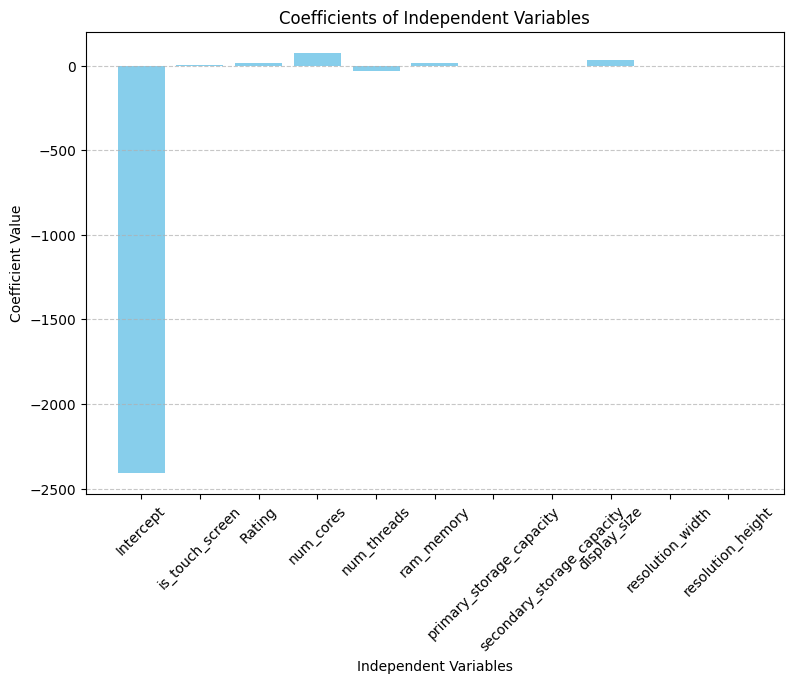

In [45]:
# Visualize Coefficients
import matplotlib.pyplot as plt

coefficients = {
    'Intercept': -2406.9394,
    'is_touch_screen': 6.2640,
    'Rating': 13.6645,
    'num_cores': 76.4062,
    'num_threads': -30.0025,
    'ram_memory': 13.4003,
    'primary_storage_capacity': 0.5079,
    'secondary_storage_capacity': -0.6392,
    'display_size': 31.1784,
    'resolution_width': 0.3118,
    'resolution_height': 0.5292
}

plt.figure(figsize=(9, 6))
plt.bar(coefficients.keys(), coefficients.values(), color='skyblue')
plt.title('Coefficients of Independent Variables')
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Coefficients Interpretation

- **Intercept**: The intercept term represents the expected value of the dependent variable (`Price`) when all independent variables are held constant at zero. In this case, it is -2406.9394, indicating the base price of laptops when all other features are absent or zero.

- **is_touch_screen**: The coefficient for the binary variable `is_touch_screen` is 6.2640. However, its p-value of 0.906 suggests that this variable is not statistically significant in predicting laptop prices at the conventional significance level of 0.05.

- **Rating**: The coefficient for the `Rating` variable is 13.6645, indicating that a one-unit increase in the laptop's rating is associated with an increase in price by $13.6645.

- **num_cores**: The coefficient for the `num_cores` variable is 76.4062, indicating that a one-unit increase in the number of cores is associated with an increase in price by $76.4062.

- **num_threads**: The coefficient for the `num_threads` variable is -30.0025, indicating that a one-unit increase in the number of threads is associated with a decrease in price by $30.0025.

- **ram_memory**: The coefficient for the `ram_memory` variable is 13.4003, indicating that a one-unit increase in RAM memory is associated with an increase in price by $13.4003.

- **primary_storage_capacity**: The coefficient for the `primary_storage_capacity` variable is 0.5079, indicating that a one-unit increase in primary storage capacity is associated with an increase in price by $0.5079.

- **secondary_storage_capacity**: The coefficient for the `secondary_storage_capacity` variable is -0.6392, but its p-value of 0.190 suggests that this variable is not statistically significant in predicting laptop prices at the conventional significance level of 0.05.

- **display_size**: The coefficient for the `display_size` variable is 31.1784, but its p-value of 0.059 suggests that this variable is marginally significant in predicting laptop prices.

- **resolution_width**: The coefficient for the `resolution_width` variable is 0.3118, indicating that a one-unit increase in the display resolution width is associated with an increase in price by $0.3118.

- **resolution_height**: The coefficient for the `resolution_height`

## Model Fit Statistics

- **F-statistic**: The F-statistic tests the overall significance of the regression model. With a value of 200.6 and a p-value of approximately 1.39e-195, the F-statistic suggests that the model is statistically significant, indicating that at least one of the independent variables significantly predicts laptop prices.

- **Adjusted R-squared**: The adjusted R-squared value of 0.743 accounts for the number of predictors in the model and provides a more accurate estimate of the proportion of variance explained by the independent variables.

## Conclusion

The regression analysis reveals that several laptop features, including rating, number of cores, number of threads, RAM memory, primary storage capacity, and display resolution, significantly influence laptop prices. However, the presence of multicollinearity or omitted variable bias cannot be ruled out, and further diagnostics may be required to assess model assumptions and validity thoroughly.


# Impacts

Given the findings of this research, the impact exists in many aspects. Firstly, by the model provided by this research, the price of a laptop can be predicted by some basic information about it. This can be helpful to customers as they can understand better how much the laptop they intended to buy is actually worth. They can see which features contribute to the price the most on each laptop so customers know what they are paying for. A wiser decision can be made if customers could have access to that information. Beyond that, laptop companies as well can use this information while they are setting prices for their laptop products to maximize the market. A successful price-setting “will entice customers to buy, but that isn't so low that you're not making a profit” (Gillen, 2023). The model we provide shows the prediction of the common price of the product based on the features which is critical in the price-making process. In addition, Insights from our predictive model can guide product design by highlighting which features contribute most significantly to perceived value and price. It could help laptop companies make design decisions in the future to design more profitable products. The result also could help in identifying the trend in the current laptop market. Such as which feature is more popular this year. And this is probably the feature which customers would pay more money on. To conclude, the model we build is practically useful from both ends of customers and companies.

# Further studies

Our study showed some promising results that can help both consumers and producers of the laptop market but there is still room for improvement.  Four major studies can be conducted based on our results.  Firstly, we could try to answer the question: "How has the importance of specific features in determining laptop prices changed over time? " This analysis could reveal shifting technology trends and consumer preferences, providing foresight into future market developments. According to Segan, “Computer and printer prices plummeted throughout the '80s and '90s, and PC storage continues to be cheaper and faster every year” (Segan, 2022). This means the price of laptops may vary every year and its relation to the feature may change.  Secondly, we could look into region market differences which explore feature importance differences in regions.  Exploring this could uncover opportunities for localized marketing strategies or product customization to meet regional demands.  Thirdly, we could focus on the impact of brand reputation by trying to answer the question: "How does a brand's reputation or perceived quality affect laptop prices? " Further research could quantify the brand effect and its interaction with product features in price setting.  Last but not least we could implement different models as we only tried the KNN model here.  We could try more advanced predictive models in machine learning algorithms in the future to increase our accuracy and overall performance.

## References

Afzal, M. (2023, December 9). 15 best selling laptops in 2023. Yahoo! Finance. https://finance.yahoo.com/news/15-best-selling-laptops-2023-182017276.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAADuqlSTbXMvnb1xhpvBsZ7W54qxGIf1JJ4TNTahMyewE-L9ZpqDiXgQVu1KGLwbA05RzhoL7kfU6WfRpfZUs3z2OYltBznbqwsn6jgoy6LUGJa9Z6TaugOmFPwr9ml_UlcH3tKS7xiJ1O_kLvAqFV7rcsdwOHQy0xv_jg4QACxHQ

Kumar, A. (2024, February 10). Laptop dataset (2024). Kaggle. https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023 

Gillen, C. (2023, July 12). 15 pricing strategies + how to set yours. Zapier. https://zapier.com/blog/pricing-strategy 

Segan, S. (2022, June 15). 1982 vs. 2022: Has technology really become more affordable?. PCMAG. https://www.pcmag.com/news/1982-vs-2022-has-technology-really-become-more-affordable 